# Knapsack with weight and volume constraints in PuLP
Source: https://transport-systems.imperial.ac.uk/tf/60008_21/n3_7_knapsack_problem.html

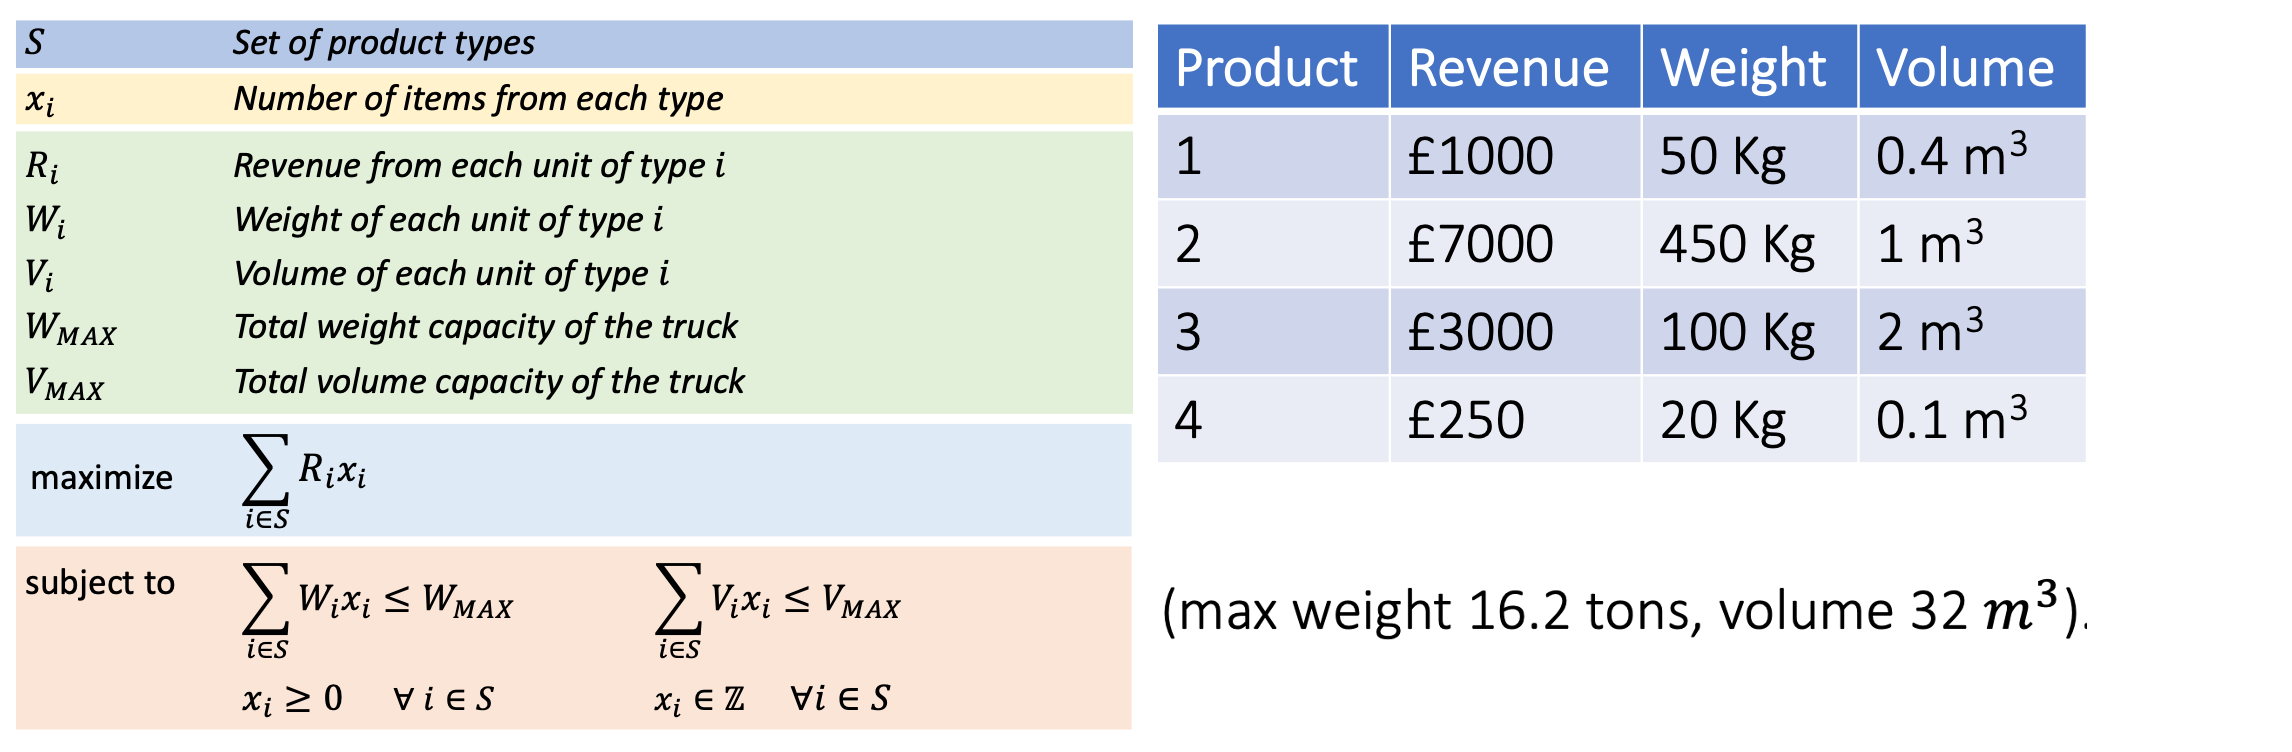

## Note: This model contains an error
The model implementation has a common error that becomes apparent when we print the model using `print(prob)`. That is, each of the constraints is added multiple times via the `for i in S:` loop, in addition to having the sum `for i in S` in each constraint. The error can be corrected by removing the `for i in S:` loop.

The model still finds the correct solution, because the extra constraints are redundant. But in a larger model this type of error may make the model more difficult to solve.

We have retained the error to illustrate how easy it is to make this type of error, and to show how printing the model can help with debugging a model. 

In [1]:
# Setting up
from pulp import *
prob = LpProblem('prob', LpMaximize)

In [2]:
S = [str(i+1) for i in range(4)]

revenues = [1000, 7000, 3000, 250]
weights  = [  50,  450,  100,  20]
volumes  = [ 0.4,    1,    2, 0.1]

R = dict(zip(S, revenues))
W = dict(zip(S, weights))
V = dict(zip(S, volumes))

W_max = 16200
V_max = 32

In [3]:
# Declaring decision variables. 
x = LpVariable.dicts('x', S,  lowBound = 0, cat = LpInteger)

In [4]:
# Declaring objectives
prob += lpSum([R[i]*x[i] for i in S])

for i in S:
    prob += lpSum([W[i]*x[i] for i in S]) <= W_max
    prob += lpSum([V[i]*x[i] for i in S]) <= V_max

In [5]:
# Solving problem
prob.solve()

print('Selected items:\n')
for v in prob.variables():
    print(f'  - Type {v.name.replace("x_","")} x {int(v.varValue):2}')

print('')
print('Total revenue:', prob.objective.value())

Selected items:

  - Type 1 x  0
  - Type 2 x 32
  - Type 3 x  0
  - Type 4 x  0

Total revenue: 224000.0


In [6]:
print(prob)

prob:
MAXIMIZE
1000*x_1 + 7000*x_2 + 3000*x_3 + 250*x_4 + 0
SUBJECT TO
_C1: 50 x_1 + 450 x_2 + 100 x_3 + 20 x_4 <= 16200

_C2: 0.4 x_1 + x_2 + 2 x_3 + 0.1 x_4 <= 32

_C3: 50 x_1 + 450 x_2 + 100 x_3 + 20 x_4 <= 16200

_C4: 0.4 x_1 + x_2 + 2 x_3 + 0.1 x_4 <= 32

_C5: 50 x_1 + 450 x_2 + 100 x_3 + 20 x_4 <= 16200

_C6: 0.4 x_1 + x_2 + 2 x_3 + 0.1 x_4 <= 32

_C7: 50 x_1 + 450 x_2 + 100 x_3 + 20 x_4 <= 16200

_C8: 0.4 x_1 + x_2 + 2 x_3 + 0.1 x_4 <= 32

VARIABLES
0 <= x_1 Integer
0 <= x_2 Integer
0 <= x_3 Integer
0 <= x_4 Integer

